In this code I compare pk computed by BOSS with the one computed by the Euclid code

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import LE3_GC_ProductReader as pr
from GaussianCovariance import *
from webdav3.client import Client
import matplotlib.pyplot as plt
from LE3_GC_ProductReader import DpdLE3GCTable

# Load Data

Load monopole and quadrupole power spectrum computed by Euclid's code

In [9]:
k_euclid = np.load('../npy_pk/k_bins.npy')
k_eff  = np.load('../npy_pk/k_eff.npy')
Eu_ngc_z1_mon = np.load('../npy_pk/monopole/NGC_z1.npy')
Eu_ngc_z3_mon = np.load('../npy_pk/monopole/NGC_z3.npy')
Eu_sgc_z1_mon = np.load('../npy_pk/monopole/SGC_z1.npy')
Eu_sgc_z3_mon = np.load('../npy_pk/monopole/SGC_z3.npy')

In [10]:
Eu_ngc_z1_quad = np.load('../npy_pk/quadrupole/NGC_z1.npy')
Eu_ngc_z3_quad = np.load('../npy_pk/quadrupole/NGC_z3.npy')
Eu_sgc_z1_quad = np.load('../npy_pk/quadrupole/SGC_z1.npy')
Eu_sgc_z3_quad = np.load('../npy_pk/quadrupole/SGC_z3.npy')

Load covariance matrix computed in Set_covariance.ipynb with GaussianCovatiance

In [11]:
cov_pk_Nz1 = np.load('../../Covariance_matrix/cov_pk_Nz1.npy')
cov_pk_Nz3 = np.load('../../Covariance_matrix/cov_pk_Nz3.npy')
cov_pk_Sz1 = np.load('../../Covariance_matrix/cov_pk_Sz1.npy')
cov_pk_Sz3 = np.load('../../Covariance_matrix/cov_pk_Sz3.npy')
std_pk_Nz1 = np.sqrt(np.diagonal(cov_pk_Nz1))
std_pk_Nz3 = np.sqrt(np.diagonal(cov_pk_Nz3))
std_pk_Sz1 = np.sqrt(np.diagonal(cov_pk_Sz1))
std_pk_Sz3 = np.sqrt(np.diagonal(cov_pk_Sz3))

Read BOSS measure, I take the measurement presented in Beutler et al 2016

monopole

In [12]:
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_monopole_DR12_NGC_z1_prerecon_120.dat', skiprows=30)
k_boss =  data[:,0]
k_boss_eff = data[:,1]
Boss_ngc_z1_mon = data[:,2]
error_boss_ngc_z1 = data[:,3]
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_monopole_DR12_NGC_z3_prerecon_120.dat', skiprows=30)
Boss_ngc_z3_mon = data[:,2]
error_boss_ngc_z3 = data[:,3]
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_monopole_DR12_SGC_z1_prerecon_120.dat', skiprows=30)
Boss_sgc_z1_mon = data[:,2]
error_boss_sgc_z1 = data[:,3]
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_monopole_DR12_SGC_z3_prerecon_120.dat', skiprows=30)
Boss_sgc_z3_mon = data[:,2]
error_boss_sgc_z3 = data[:,3]

quadrupole

In [13]:
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_quadrupole_DR12_NGC_z1_prerecon_120.dat', skiprows=30)
Boss_ngc_z1_quad = data[:,2]
error_boss_ngc_z1_quad = data[:,3]
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_quadrupole_DR12_NGC_z3_prerecon_120.dat', skiprows=30)
Boss_ngc_z3_quad = data[:,2]
error_boss_ngc_z3_quad = data[:,3]
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_quadrupole_DR12_SGC_z1_prerecon_120.dat', skiprows=30)
Boss_sgc_z1_quad = data[:,2]
error_boss_sgc_z1_quad = data[:,3]
data = np.loadtxt('../BOSS_results/public_material_RSD/Beutleretal_pk_quadrupole_DR12_SGC_z3_prerecon_120.dat', skiprows=30)
Boss_sgc_z3_quad = data[:,2]
error_boss_ngc_z1_quad = data[:,3]

# Plots

I start with a comparison with BOSS data

## NGC z1

Text(0.5, 1.0, 'Monopole NGC $0.2<z<0.5$')

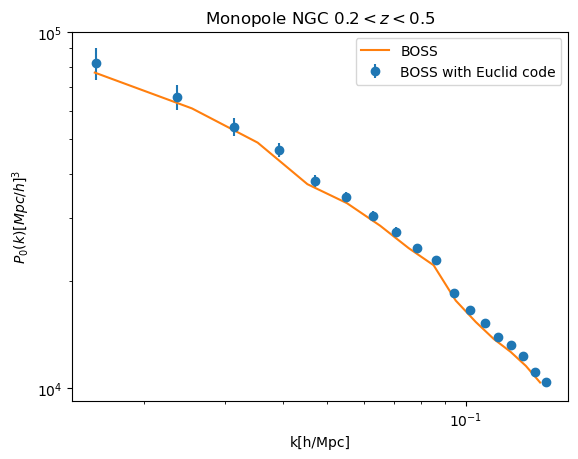

In [14]:
plt.errorbar(k_euclid, Eu_ngc_z1_mon, label='BOSS with Euclid code', yerr=std_pk_Nz1[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_ngc_z1_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole NGC $0.2<z<0.5$')

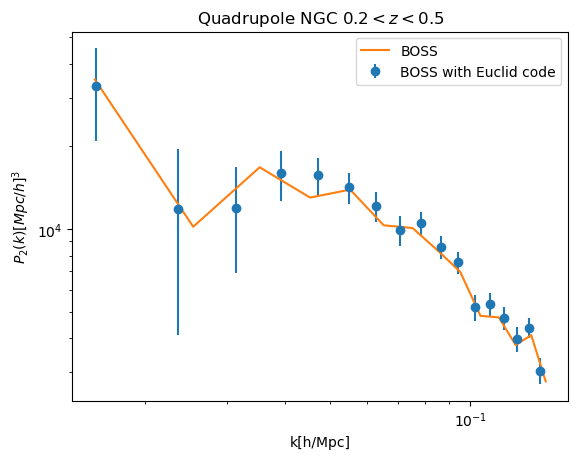

In [9]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z1_quad[:-1], label='BOSS with Euclid code', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_ngc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.2<z<0.5$')


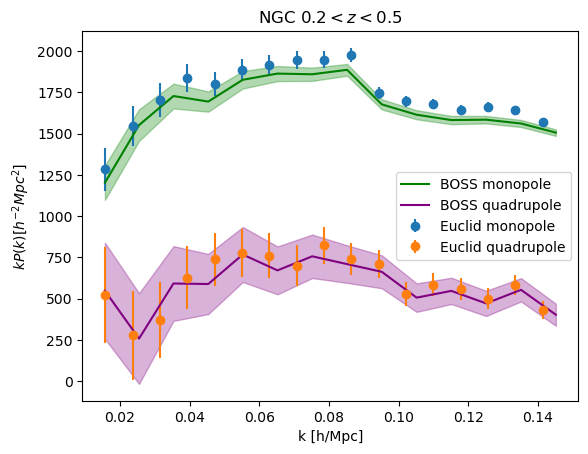

In [10]:
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_ngc_z1_mon[:-1], yerr=k_euclid[:-1]*std_pk_Nz1[:len(k_euclid)-1], fmt='o', label='Euclid monopole')
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_ngc_z1_quad[:-1], yerr=k_euclid[:-1]*std_pk_Nz1[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_boss, k_boss*Boss_ngc_z1_mon, label='BOSS monopole',color='green')
plt.fill_between(k_boss, k_boss*(Boss_ngc_z1_mon-error_boss_ngc_z1), k_boss*(Boss_ngc_z1_mon+error_boss_ngc_z1), alpha=0.3,color='green')
plt.fill_between(k_boss, k_boss*(Boss_ngc_z1_quad-error_boss_ngc_z1_quad), k_boss*(Boss_ngc_z1_quad+error_boss_ngc_z1_quad), alpha=0.3, color='purple')
plt.plot(k_boss, k_boss*Boss_ngc_z1_quad, label='BOSS quadrupole', color='purple' )
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P(k)[h^{-2}Mpc^2]$')
plt.title(r'NGC $0.2<z<0.5$')
plt.legend()

## NGC z3

Text(0.5, 1.0, 'Monopole NGC $0.4<z<0.6$')

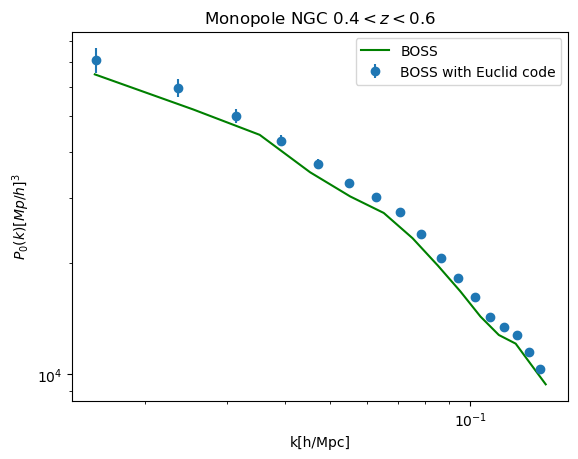

In [16]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z3_mon[:-1], yerr=std_pk_Nz3[:len(k_euclid)-1], fmt='o', label='BOSS with Euclid code')
plt.plot(k_boss, Boss_ngc_z3_mon, label='BOSS',color='green')
plt.legend()
plt.xscale('log')   
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mp/h]^3$')
plt.title(r'Monopole NGC $0.4<z<0.6$')


Text(0.5, 1.0, 'Quadrupole NGC $0.4<z<0.6$')

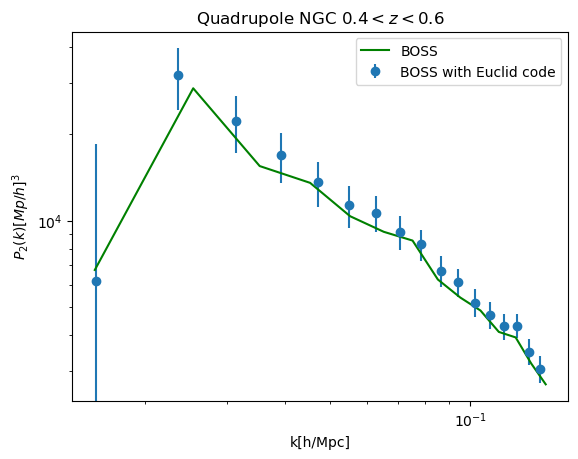

In [12]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z3_quad[:-1], yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o', label='BOSS with Euclid code')
plt.plot(k_boss, Boss_ngc_z3_quad, label='BOSS',color='green')
plt.legend()
plt.xscale('log')   
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mp/h]^3$')
plt.title(r'Quadrupole NGC $0.4<z<0.6$')


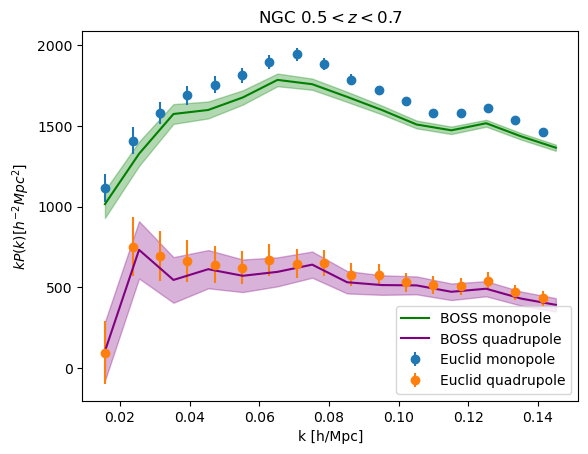

In [13]:
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_ngc_z3_mon[:-1], yerr=k_euclid[:-1]*std_pk_Nz3[:len(k_euclid)-1], fmt='o', label='Euclid monopole')
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_ngc_z3_quad[:-1], yerr=k_euclid[:-1]*std_pk_Nz3[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_boss, k_boss*Boss_ngc_z3_mon, label='BOSS monopole',color='green')
plt.fill_between(k_boss, k_boss*(Boss_ngc_z3_mon-error_boss_ngc_z3), k_boss*(Boss_ngc_z3_mon+error_boss_ngc_z3), alpha=0.3,color='green')
plt.fill_between(k_boss, k_boss*(Boss_ngc_z3_quad-error_boss_ngc_z3_quad), k_boss*(Boss_ngc_z3_quad+error_boss_ngc_z3_quad), alpha=0.3, color='purple')
plt.plot(k_boss, k_boss*Boss_ngc_z3_quad, label='BOSS quadrupole', color='purple' )
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P(k)[h^{-2}Mpc^2]$')
plt.title(r'NGC $0.5<z<0.7$')
plt.legend()

##  SGC z1

Text(0.5, 1.0, 'Monopole SGC $0.2<z<0.5$')

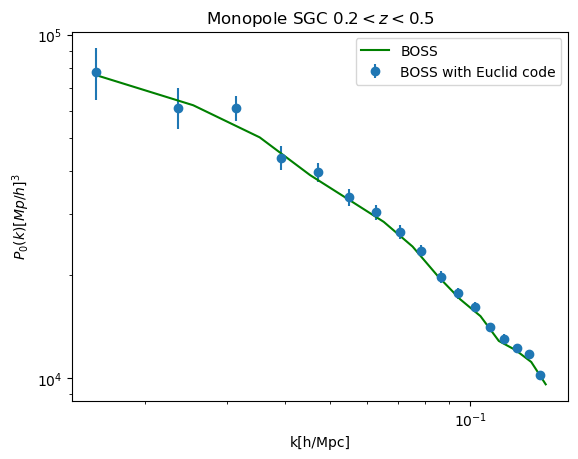

In [14]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_mon[:-1], yerr=std_pk_Sz1[:len(k_euclid)-1], fmt='o', label='BOSS with Euclid code')
plt.plot(k_boss, Boss_sgc_z1_mon, label='BOSS',color='green')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mp/h]^3$')
plt.title(r'Monopole SGC $0.2<z<0.5$')


Text(0.5, 1.0, 'Quadrupole SGC $0.2<z<0.5$')

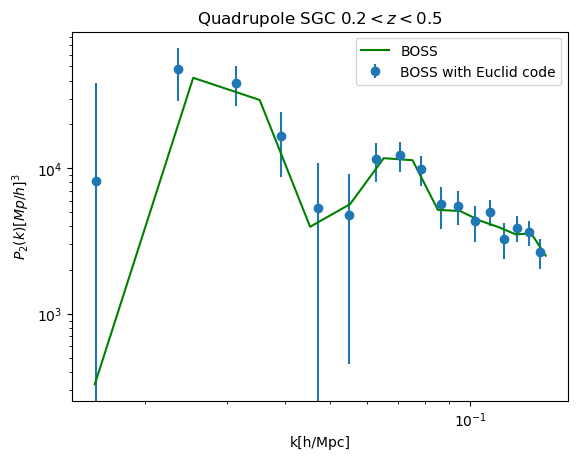

In [15]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_quad[:-1], yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o', label='BOSS with Euclid code')
plt.plot(k_boss, Boss_sgc_z1_quad, label='BOSS',color='green')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mp/h]^3$')
plt.title(r'Quadrupole SGC $0.2<z<0.5$')

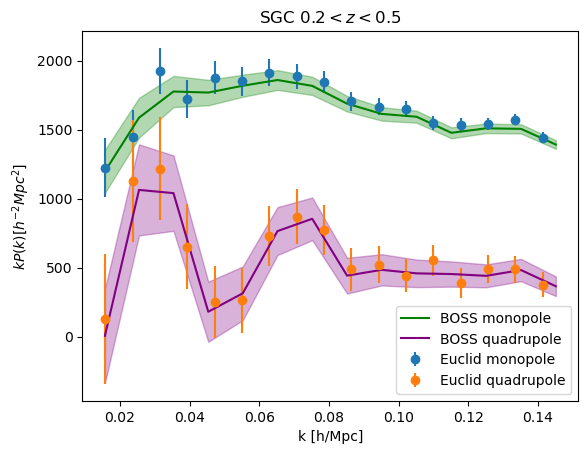

In [16]:
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_sgc_z1_mon[:-1], yerr=k_euclid[:-1]*std_pk_Sz1[:len(k_euclid)-1], fmt='o', label='Euclid monopole')   
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_sgc_z1_quad[:-1], yerr=k_euclid[:-1]*std_pk_Sz1[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_boss, k_boss*Boss_sgc_z1_mon, label='BOSS monopole',color='green')
plt.fill_between(k_boss, k_boss*(Boss_sgc_z1_mon-error_boss_sgc_z1), k_boss*(Boss_sgc_z1_mon+error_boss_sgc_z1), alpha=0.3,color='green')
plt.fill_between(k_boss, k_boss*(Boss_sgc_z1_quad-error_boss_sgc_z1_quad), k_boss*(Boss_sgc_z1_quad+error_boss_sgc_z1_quad), alpha=0.3, color='purple')
plt.plot(k_boss, k_boss*Boss_sgc_z1_quad, label='BOSS quadrupole', color='purple' )
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P(k)[h^{-2}Mpc^2]$')
plt.title(r'SGC $0.2<z<0.5$')
plt.legend()


## SGC z3

Text(0.5, 1.0, 'Monopole SGC $0.4<z<0.6$')

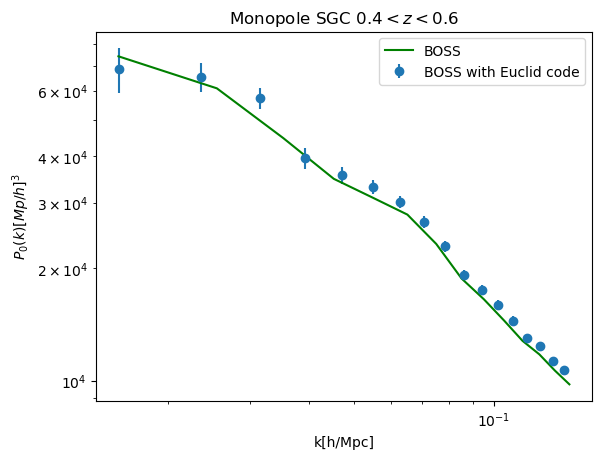

In [17]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z3_mon[:-1], yerr=std_pk_Sz3[:len(k_euclid)-1], fmt='o', label='BOSS with Euclid code')
plt.plot(k_boss, Boss_sgc_z3_mon, label='BOSS',color='green')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mp/h]^3$')
plt.title(r'Monopole SGC $0.4<z<0.6$')


Text(0.5, 1.0, 'Quadrupole SGC $0.4<z<0.6$')

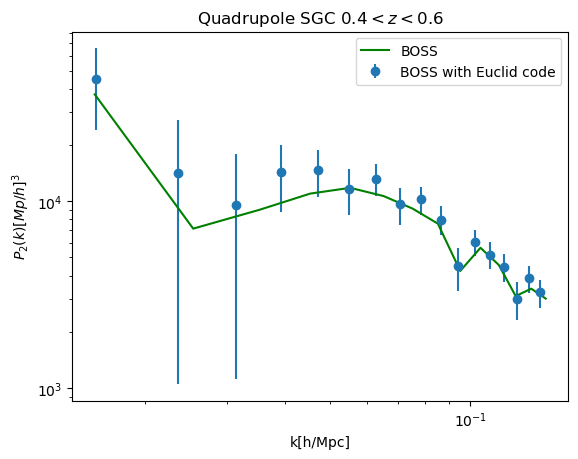

In [18]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z3_quad[:-1], yerr=std_pk_Sz3[len(k_euclid):-1], fmt='o', label='BOSS with Euclid code')
plt.plot(k_boss, Boss_sgc_z3_quad, label='BOSS',color='green')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mp/h]^3$')
plt.title(r'Quadrupole SGC $0.4<z<0.6$')

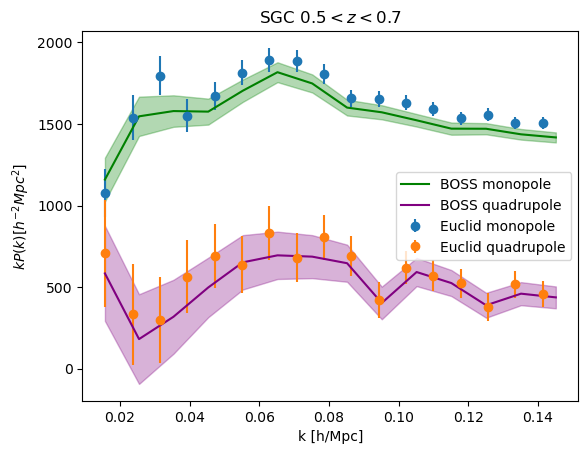

In [19]:
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_sgc_z3_mon[:-1], yerr=k_euclid[:-1]*std_pk_Sz3[:len(k_euclid)-1], fmt='o', label='Euclid monopole')
plt.errorbar(k_euclid[:-1], k_euclid[:-1]*Eu_sgc_z3_quad[:-1], yerr=k_euclid[:-1]*std_pk_Sz3[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_boss, k_boss*Boss_sgc_z3_mon, label='BOSS monopole',color='green')
plt.fill_between(k_boss, k_boss*(Boss_sgc_z3_mon-error_boss_sgc_z3), k_boss*(Boss_sgc_z3_mon+error_boss_sgc_z3), alpha=0.3,color='green')
plt.fill_between(k_boss, k_boss*(Boss_sgc_z3_quad-error_boss_ngc_z1_quad), k_boss*(Boss_sgc_z3_quad+error_boss_ngc_z1_quad), alpha=0.3, color='purple')
plt.plot(k_boss, k_boss*Boss_sgc_z3_quad, label='BOSS quadrupole', color='purple' )
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P(k)[h^{-2}Mpc^2]$')
plt.title(r'SGC $0.5<z<0.7$')
plt.legend()

# Comparison between NGC and SGC

Text(0, 0.5, '$P_2(k)[Mp/h]^3$')

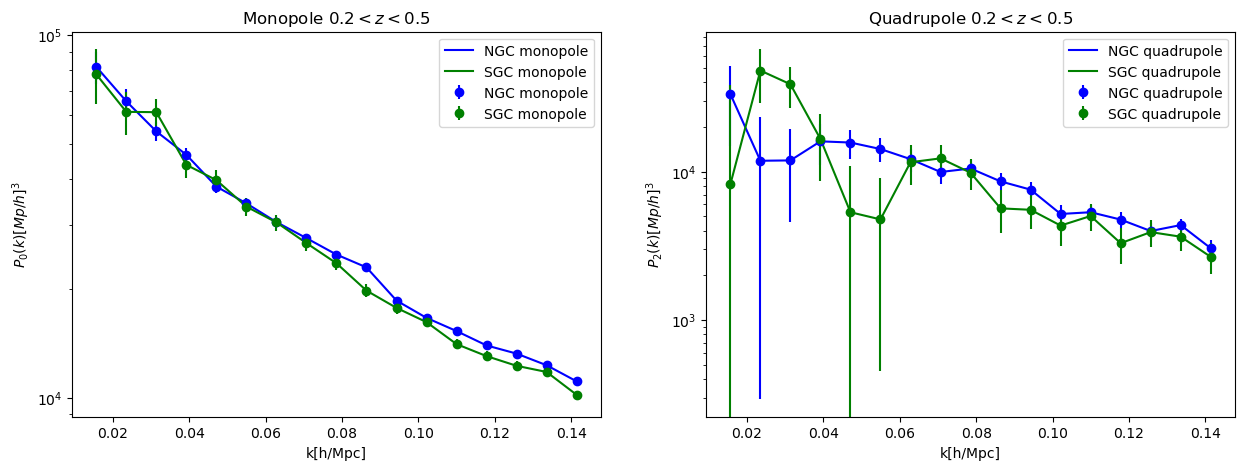

In [22]:
#plotting ngc vs sgc at z1 for monopole and quadrupole
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].errorbar(k_euclid[:-1], Eu_ngc_z1_mon[:-1], yerr=std_pk_Nz1[:len(k_euclid)-1], fmt='o', label='NGC monopole', color = 'blue')
axs[0].errorbar(k_euclid[:-1], Eu_sgc_z1_mon[:-1], yerr=std_pk_Sz1[:len(k_euclid)-1], fmt='o', label='SGC monopole', color='green')
axs[0].plot(k_euclid[:-1], Eu_ngc_z1_mon[:-1], label='NGC monopole', color='blue')
axs[0].plot(k_euclid[:-1], Eu_sgc_z1_mon[:-1], label='SGC monopole', color = 'green')
axs[0].set_title('Monopole $0.2<z<0.5$')
axs[0].legend()
#axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('k[h/Mpc]')
axs[0].set_ylabel(r'$P_0(k)[Mp/h]^3$')
axs[1].errorbar(k_euclid[:-1], Eu_ngc_z1_quad[:-1], yerr=std_pk_Nz1[len(k_euclid):-1], fmt='o', label='NGC quadrupole', color='blue')
axs[1].errorbar(k_euclid[:-1], Eu_sgc_z1_quad[:-1], yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o', label='SGC quadrupole' , color='green')
axs[1].plot(k_euclid[:-1], Eu_ngc_z1_quad[:-1], label='NGC quadrupole', color='blue')
axs[1].plot(k_euclid[:-1], Eu_sgc_z1_quad[:-1], label='SGC quadrupole', color='green')
axs[1].set_title('Quadrupole $0.2<z<0.5$')
axs[1].legend()
#axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('k[h/Mpc]')
axs[1].set_ylabel(r'$P_2(k)[Mp/h]^3$')


Text(0, 0.5, '$P_2(k)[Mp/h]^3$')

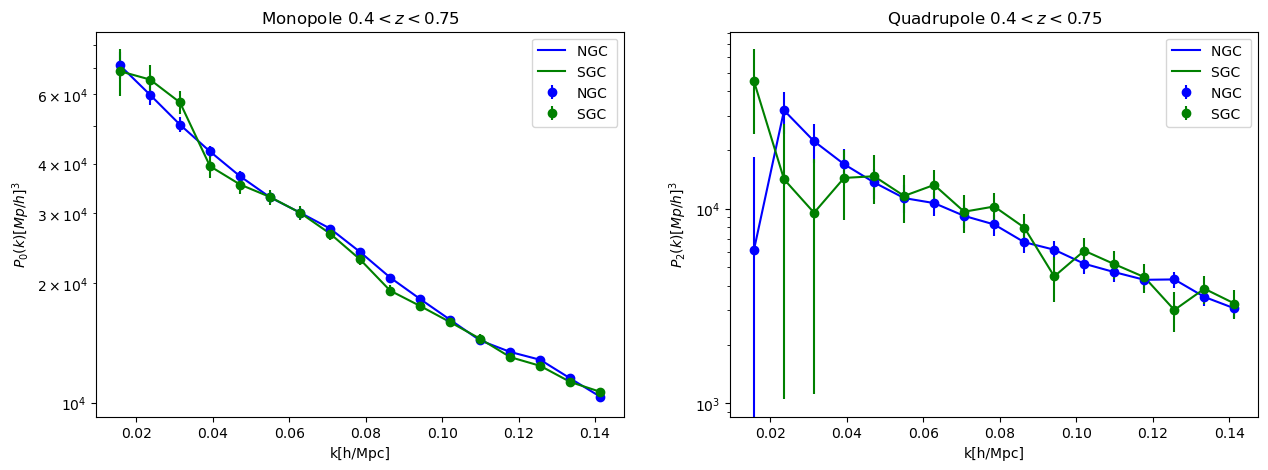

In [24]:
#plotting ngc vs sgc at z3 for monopole and quadrupole
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].errorbar(k_euclid[:-1], Eu_ngc_z3_mon[:-1], yerr=std_pk_Nz3[:len(k_euclid)-1], fmt='o', label='NGC', color = 'blue')
axs[0].errorbar(k_euclid[:-1], Eu_sgc_z3_mon[:-1], yerr=std_pk_Sz3[:len(k_euclid)-1], fmt='o', label='SGC ', color='green')
axs[0].plot(k_euclid[:-1], Eu_ngc_z3_mon[:-1], label='NGC ', color='blue')
axs[0].plot(k_euclid[:-1], Eu_sgc_z3_mon[:-1], label='SGC ', color = 'green')
axs[0].set_title('Monopole $0.4<z<0.75$')
axs[0].legend()
#axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('k[h/Mpc]')
axs[0].set_ylabel(r'$P_0(k)[Mp/h]^3$')
axs[1].errorbar(k_euclid[:-1], Eu_ngc_z3_quad[:-1], yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o', label='NGC ', color='blue')
axs[1].errorbar(k_euclid[:-1], Eu_sgc_z3_quad[:-1], yerr=std_pk_Sz3[len(k_euclid):-1], fmt='o', label='SGC ' , color='green')
axs[1].plot(k_euclid[:-1], Eu_ngc_z3_quad[:-1], label='NGC ', color='blue')
axs[1].plot(k_euclid[:-1], Eu_sgc_z3_quad[:-1], label='SGC ', color='green')
axs[1].set_title('Quadrupole $0.4<z<0.75$')
axs[1].legend()
#axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('k[h/Mpc]')
axs[1].set_ylabel(r'$P_2(k)[Mp/h]^3$')

# Plot with only systematic weights amd without weights

In [22]:
ngc_z1_sys = np.load('../npy_pk/sys_weights/NGC_z1.npy')
ngc_z3_sys = np.load('../npy_pk/sys_weights/NGC_z3.npy')
sgc_z1_sys = np.load('../npy_pk/sys_weights/SGC_z1.npy')
sgc_z3_sys = np.load('../npy_pk/sys_weights/SGC_z3.npy')

In [23]:
ngc_z1_noweights = np.load('../npy_pk/no_weights/NGC_z1.npy')
ngc_z3_noweights = np.load('../npy_pk/no_weights/NGC_z3.npy')
sgc_z1_noweights = np.load('../npy_pk/no_weights/SGC_z1.npy')
sgc_z3_noweights = np.load('../npy_pk/no_weights/SGC_z3.npy')

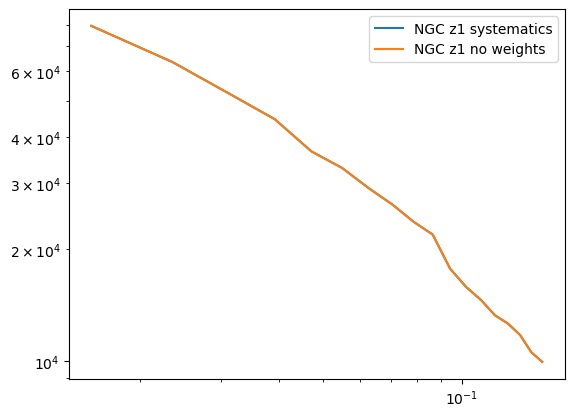

In [24]:
plt.loglog(k_euclid, ngc_z1_sys, label='NGC z1 systematics')
plt.loglog(k_euclid, ngc_z1_noweights, label='NGC z1 no weights')
plt.legend()

Text(0.5, 1.0, 'Monopole NGC $0.2<z<0.5$')

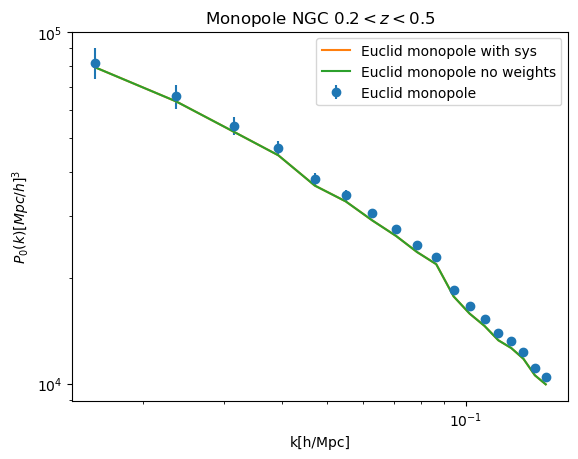

In [25]:
plt.errorbar(k_euclid, Eu_ngc_z1_mon, yerr=std_pk_Nz1[:len(k_euclid)], fmt='o', label='Euclid monopole')
plt.plot(k_euclid, ngc_z1_sys, label='Euclid monopole with sys')
plt.plot(k_euclid, ngc_z1_noweights , label='Euclid monopole no weights')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole NGC $0.4<z<0.6$')

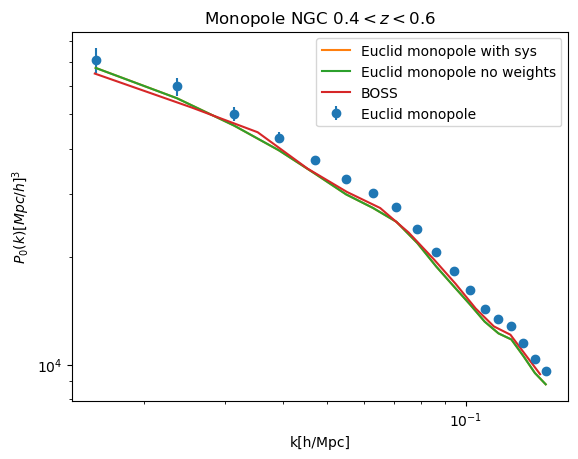

In [26]:
plt.errorbar(k_euclid, Eu_ngc_z3_mon, yerr=std_pk_Nz3[:len(k_euclid)], fmt='o', label='Euclid monopole')
plt.plot(k_euclid, ngc_z3_sys, label='Euclid monopole with sys')
plt.plot(k_euclid, ngc_z3_noweights , label='Euclid monopole no weights')
plt.plot(k_boss, Boss_ngc_z3_mon, label='BOSS')
#plt.fill_between(k_boss, Boss_ngc_z3_mon-error_boss_ngc_z3, Boss_ngc_z3_mon+error_boss_ngc_z3, alpha=0.3, color='red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.4<z<0.6$')

Text(0.5, 1.0, 'Monopole SGC $0.2<z<0.5$')

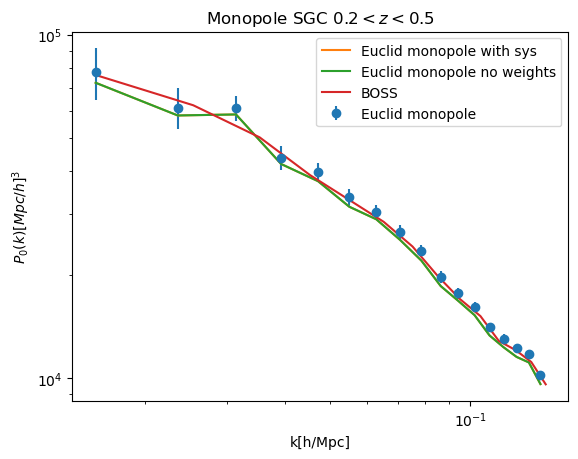

In [27]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_mon[:-1], yerr=std_pk_Sz1[:len(k_euclid)-1], fmt='o', label='Euclid monopole')
plt.plot(k_euclid[:-1], sgc_z1_sys[:-1], label='Euclid monopole with sys')
plt.plot(k_euclid[:-1], sgc_z1_noweights[:-1] , label='Euclid monopole no weights')
plt.plot(k_boss, Boss_sgc_z1_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole SGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole SGC $0.4<z<0.6$')

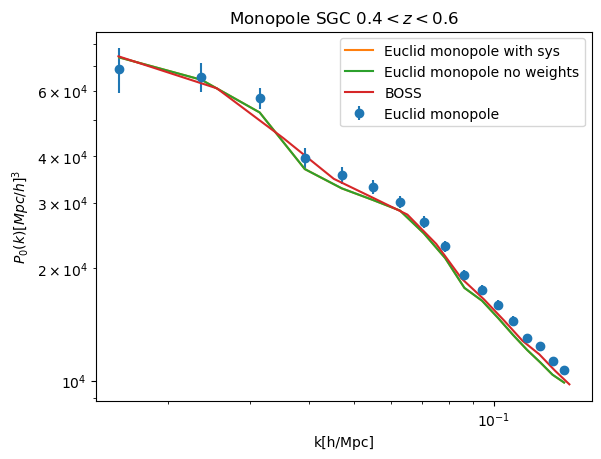

In [34]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z3_mon[:-1], yerr=std_pk_Sz3[:len(k_euclid)-1], fmt='o', label='Euclid monopole')
plt.plot(k_euclid[:-1], sgc_z3_sys[:-1], label='Euclid monopole with sys')
plt.plot(k_euclid[:-1], sgc_z3_noweights[:-1] , label='Euclid monopole no weights')
plt.plot(k_boss, Boss_sgc_z3_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole SGC $0.4<z<0.6$')

In [35]:
quad_ngc_z1_sys = np.load('../npy_pk/sys_weights/NGC_z1_quad.npy')
quad_ngc_z3_sys = np.load('../npy_pk/sys_weights/NGC_z3_quad.npy')
quad_sgc_z1_sys = np.load('../npy_pk/sys_weights/SGC_z1_quad.npy')
quad_sgc_z3_sys = np.load('../npy_pk/sys_weights/SGC_z3_quad.npy')

In [36]:
quad_ngc_z1_noweights = np.load('../npy_pk/no_weights/NGC_z1_quad.npy')
quad_ngc_z3_noweights = np.load('../npy_pk/no_weights/NGC_z3_quad.npy')
quad_sgc_z1_noweights = np.load('../npy_pk/no_weights/SGC_z1_quad.npy')
quad_sgc_z3_noweights = np.load('../npy_pk/no_weights/SGC_z3_quad.npy')


Text(0.5, 1.0, 'Quadrupole NGC $0.2<z<0.5$')

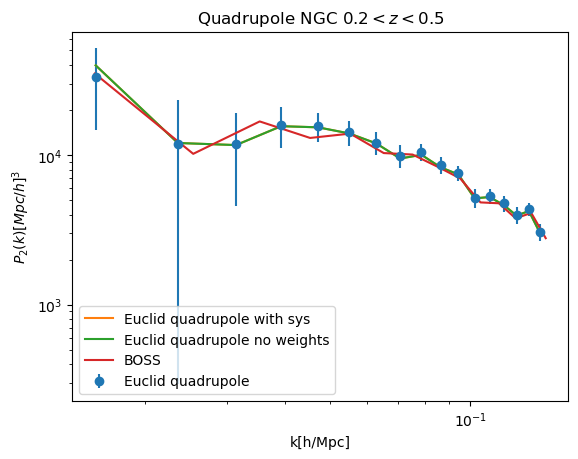

In [43]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z1_quad[:-1], yerr=std_pk_Nz1[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_euclid[:-1], quad_ngc_z1_sys[:-1], label='Euclid quadrupole with sys')
plt.plot(k_euclid[:-1], quad_ngc_z1_noweights[:-1] , label='Euclid quadrupole no weights')
plt.plot(k_boss, Boss_ngc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole NGC $0.4<z<0.6$')

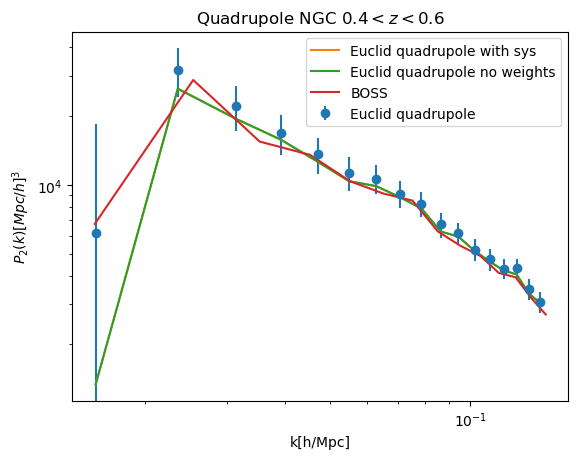

In [44]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z3_quad[:-1], yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_euclid[:-1], quad_ngc_z3_sys[:-1], label='Euclid quadrupole with sys')
plt.plot(k_euclid[:-1], quad_ngc_z3_noweights[:-1] , label='Euclid quadrupole no weights')
plt.plot(k_boss, Boss_ngc_z3_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.4<z<0.6$')

Text(0.5, 1.0, 'Quadrupole SGC $0.2<z<0.5$')

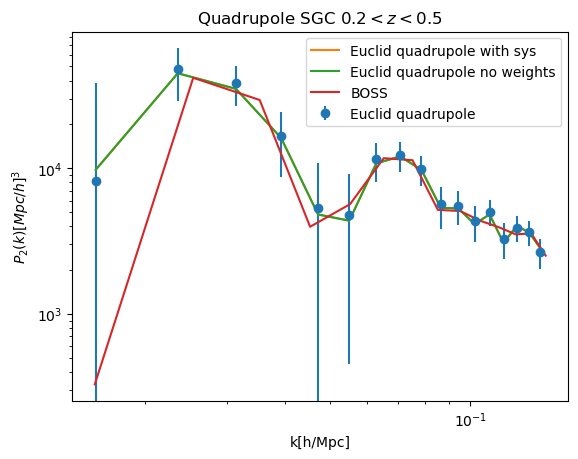

In [45]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_quad[:-1], yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_euclid[:-1], quad_sgc_z1_sys[:-1], label='Euclid quadrupole with sys')
plt.plot(k_euclid[:-1], quad_sgc_z1_noweights[:-1] , label='Euclid quadrupole no weights')
plt.plot(k_boss, Boss_sgc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole SGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole SGC $0.4<z<0.6$')

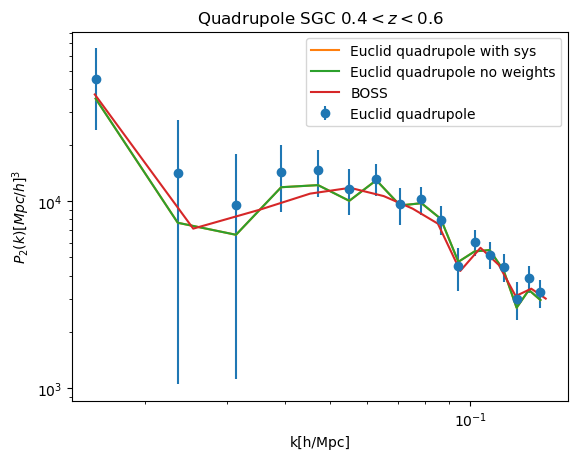

In [46]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z3_quad[:-1], yerr=std_pk_Sz3[len(k_euclid):-1], fmt='o', label='Euclid quadrupole')
plt.plot(k_euclid[:-1], quad_sgc_z3_sys[:-1], label='Euclid quadrupole with sys')
plt.plot(k_euclid[:-1], quad_sgc_z3_noweights[:-1] , label='Euclid quadrupole no weights')
plt.plot(k_boss, Boss_sgc_z3_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole SGC $0.4<z<0.6$')

Comparison between pk with fkp weight and without

In [28]:
#load data without fkp weights
Eu_ngc_z1_mon_nofkp = np.load('../npy_pk/monopole/no_fkp/NGC_z1_nofkp.npy')
Eu_ngc_z3_mon_nofkp = np.load('../npy_pk/monopole/no_fkp/NGC_z3_nofkp.npy')
Eu_sgc_z1_mon_nofkp = np.load('../npy_pk/monopole/no_fkp/SGC_z1_nofkp.npy')
Eu_sgc_z3_mon_nofkp = np.load('../npy_pk/monopole/no_fkp/SGC_z3_nofkp.npy')
Eu_ngc_z1_quad_nofkp = np.load('../npy_pk/quadrupole/no_fkp/NGC_z1_nofkp.npy')
Eu_ngc_z3_quad_nofkp = np.load('../npy_pk/quadrupole/no_fkp/NGC_z3_nofkp.npy')
Eu_sgc_z1_quad_nofkp = np.load('../npy_pk/quadrupole/no_fkp/SGC_z1_nofkp.npy')
Eu_sgc_z3_quad_nofkp = np.load('../npy_pk/quadrupole/no_fkp/SGC_z3_nofkp.npy')

Text(0.5, 1.0, 'Monopole NGC $0.2<z<0.5$')

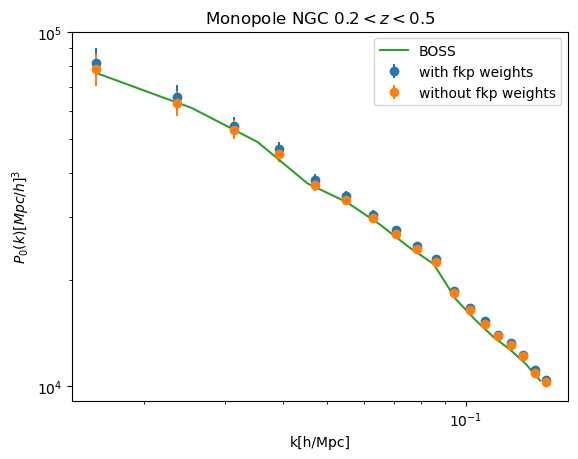

In [27]:
plt.errorbar(k_euclid, Eu_ngc_z1_mon, label='with fkp weights', yerr=std_pk_Nz1[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, Eu_ngc_z1_mon_nofkp, label='without fkp weights', yerr=std_pk_Nz1[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_ngc_z1_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log') 
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole NGC $0.2<z<0.5$')

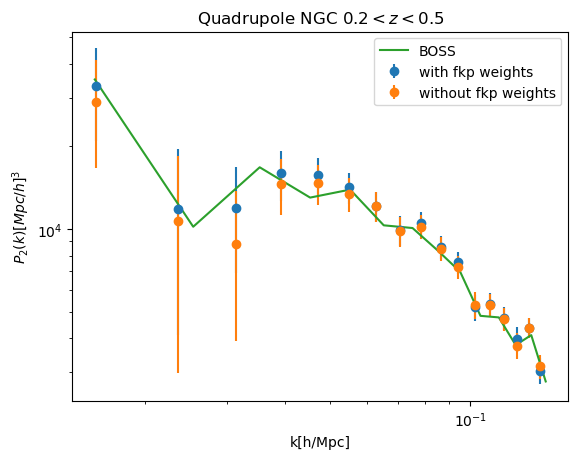

In [29]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z1_quad[:-1], label='with fkp weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], Eu_ngc_z1_quad_nofkp[:-1], label='without fkp weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_ngc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole NGC $0.2<z<0.5$')

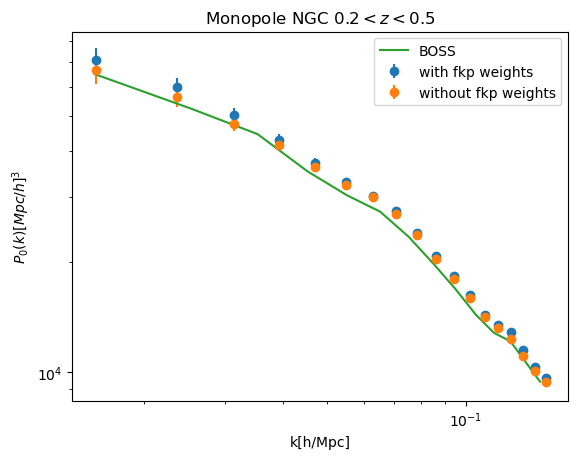

In [36]:
plt.errorbar(k_euclid, Eu_ngc_z3_mon, label='with fkp weights', yerr=std_pk_Nz3[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, Eu_ngc_z3_mon_nofkp, label='without fkp weights', yerr=std_pk_Nz3[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_ngc_z3_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log') 
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole NGC $0.2<z<0.5$')

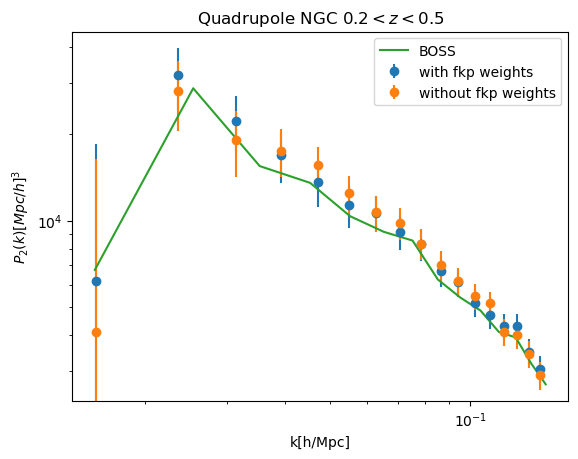

In [31]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z3_quad[:-1], label='with fkp weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], Eu_ngc_z3_quad_nofkp[:-1], label='without fkp weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_ngc_z3_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole SGC $0.2<z<0.5$')

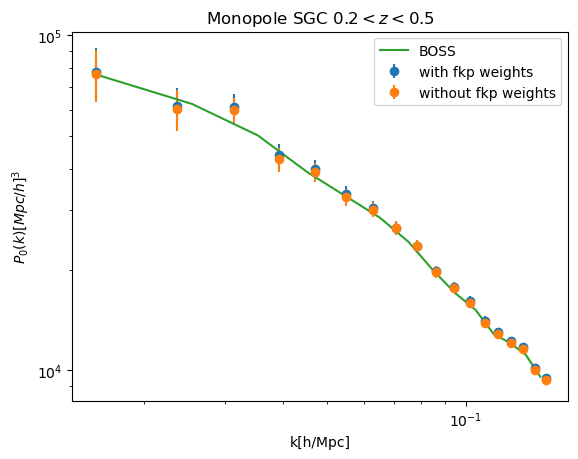

In [32]:
plt.errorbar(k_euclid, Eu_sgc_z1_mon, label='with fkp weights', yerr=std_pk_Sz1[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, Eu_sgc_z1_mon_nofkp, label='without fkp weights', yerr=std_pk_Sz1[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_sgc_z1_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole SGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole SGC $0.2<z<0.5$')

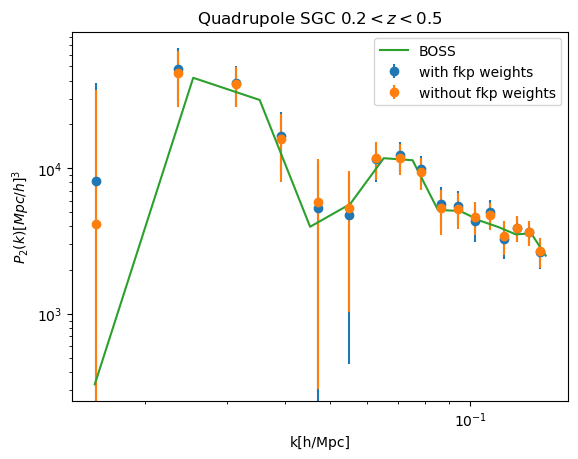

In [33]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_quad[:-1], label='with fkp weights', yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_quad_nofkp[:-1], label='without fkp weights', yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_sgc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole SGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole SGC $0.2<z<0.5$')

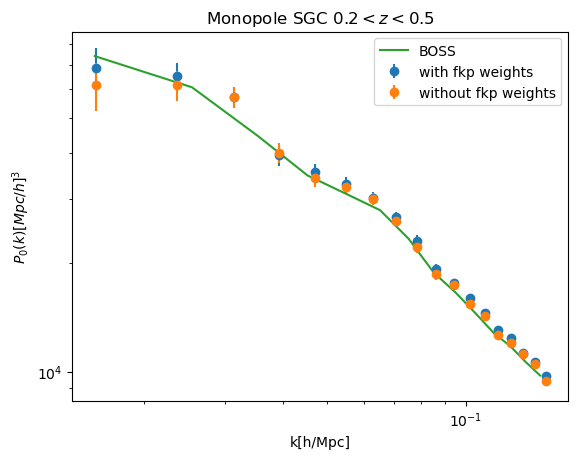

In [34]:
plt.errorbar(k_euclid, Eu_sgc_z3_mon, label='with fkp weights', yerr=std_pk_Sz3[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, Eu_sgc_z3_mon_nofkp, label='without fkp weights', yerr=std_pk_Sz3[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_sgc_z3_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole SGC $0.2<z<0.5$')

# Power spectrum with Count Pairs weight

In [6]:
ngc_z1_cp = np.load('../npy_pk/cp_weights/NGC_z1_mono.npy')
ngc_z2_cp = np.load('../npy_pk/cp_weights/NGC_z3_mono.npy')
sgc_z1_cp = np.load('../npy_pk/cp_weights/SGC_z1_mono.npy')
sgc_z2_cp = np.load('../npy_pk/cp_weights/SGC_z3_mono.npy')
ngc_z1_cp_quad = np.load('../npy_pk/cp_weights/NGC_z1_quad.npy')
ngc_z2_cp_quad = np.load('../npy_pk/cp_weights/NGC_z3_quad.npy')
sgc_z1_cp_quad = np.load('../npy_pk/cp_weights/SGC_z1_quad.npy')
sgc_z2_cp_quad = np.load('../npy_pk/cp_weights/SGC_z3_quad.npy')

Text(0.5, 1.0, 'Monopole NGC $0.2<z<0.5$')

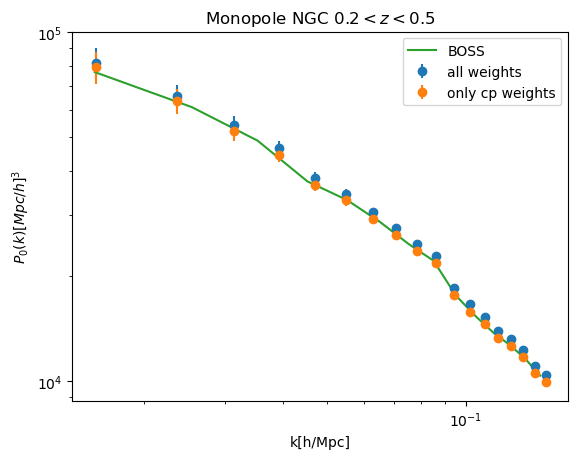

In [14]:
plt.errorbar(k_euclid, Eu_ngc_z1_mon, label='all weights', yerr=std_pk_Nz1[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, ngc_z1_cp, label='only cp weights', yerr=std_pk_Nz1[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_ngc_z1_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.2<z<0.5$')


Text(0.5, 1.0, 'Quadrupole NGC $0.2<z<0.5$')

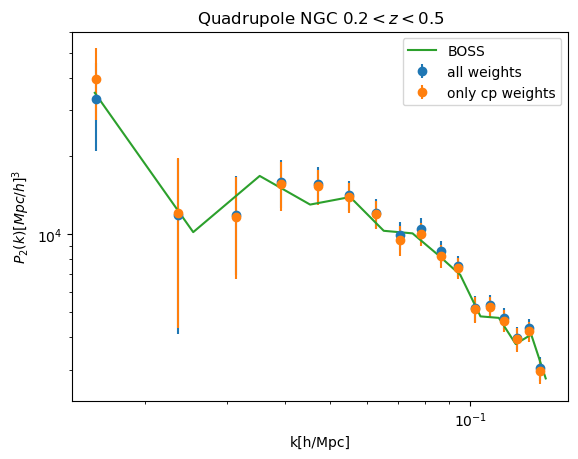

In [15]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z1_quad[:-1], label='all weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], ngc_z1_cp_quad[:-1], label='only cp weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_ngc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole NGC $0.4<z<0.6$')

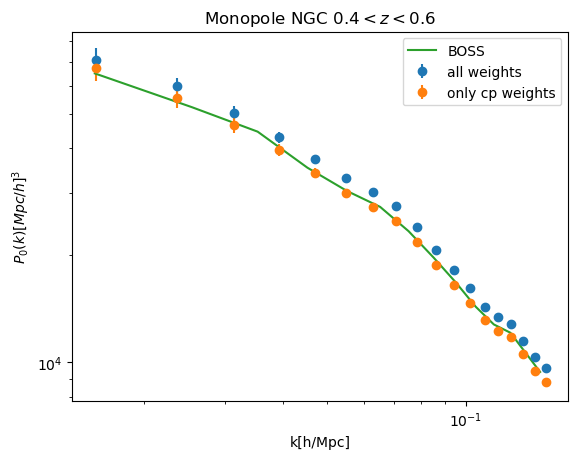

In [16]:
plt.errorbar(k_euclid, Eu_ngc_z3_mon, label='all weights', yerr=std_pk_Nz3[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, ngc_z2_cp, label='only cp weights', yerr=std_pk_Nz3[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_ngc_z3_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole NGC $0.4<z<0.6$')

Text(0.5, 1.0, 'Quadrupole NGC $0.4<z<0.6$')

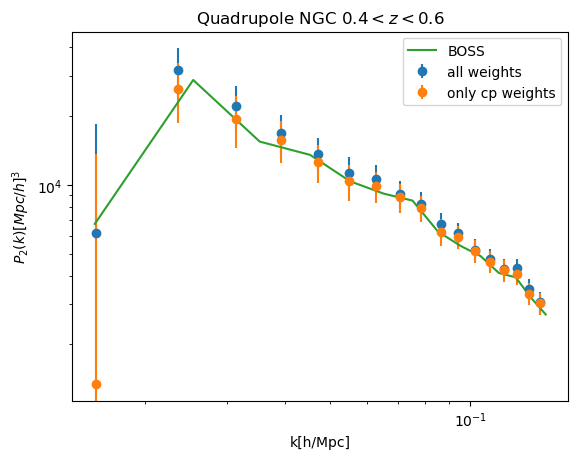

In [17]:
plt.errorbar(k_euclid[:-1], Eu_ngc_z3_quad[:-1], label='all weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], ngc_z2_cp_quad[:-1], label='only cp weights', yerr=std_pk_Nz3[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_ngc_z3_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole NGC $0.4<z<0.6$')

Text(0.5, 1.0, 'Monopole SGC $0.2<z<0.5$')

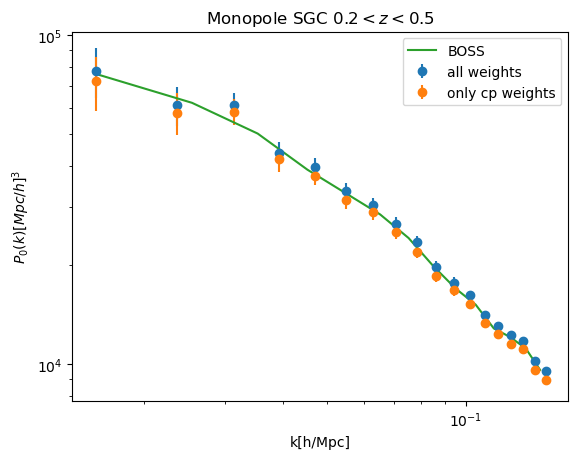

In [18]:
plt.errorbar(k_euclid, Eu_sgc_z1_mon, label='all weights', yerr=std_pk_Sz1[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, sgc_z1_cp, label='only cp weights', yerr=std_pk_Sz1[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_sgc_z1_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole SGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Quadrupole SGC $0.2<z<0.5$')

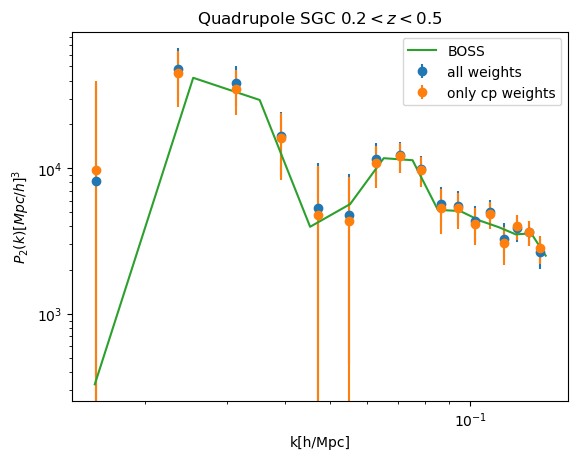

In [19]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z1_quad[:-1], label='all weights', yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], sgc_z1_cp_quad[:-1], label='only cp weights', yerr=std_pk_Sz1[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_sgc_z1_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole SGC $0.2<z<0.5$')

Text(0.5, 1.0, 'Monopole SGC $0.4<z<0.6$')

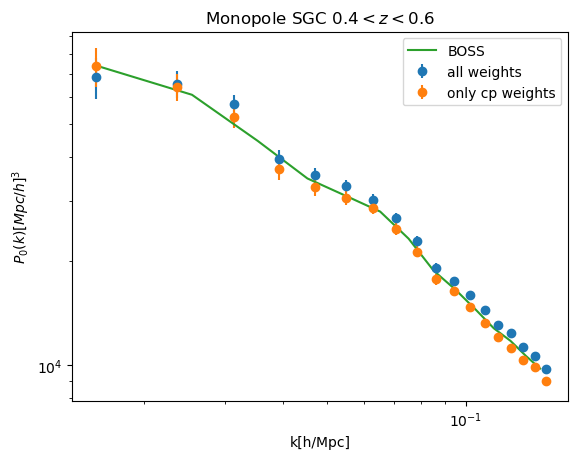

In [20]:
plt.errorbar(k_euclid, Eu_sgc_z3_mon, label='all weights', yerr=std_pk_Sz3[:len(k_euclid)], fmt='o')
plt.errorbar(k_euclid, sgc_z2_cp, label='only cp weights', yerr=std_pk_Sz3[:len(k_euclid)], fmt='o')
plt.plot(k_boss, Boss_sgc_z3_mon, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_0(k)[Mpc/h]^3$')
plt.title(r'Monopole SGC $0.4<z<0.6$')

Text(0.5, 1.0, 'Quadrupole SGC $0.4<z<0.6$')

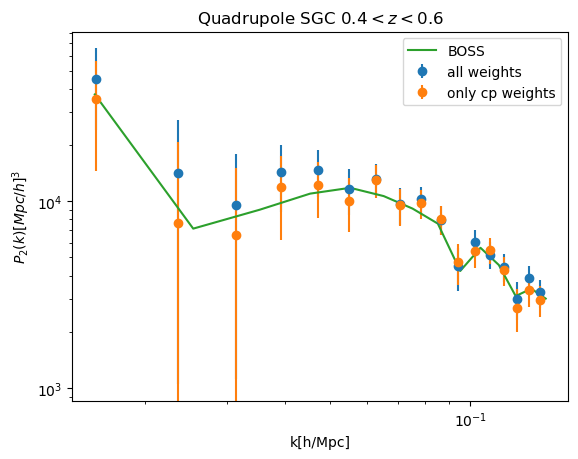

In [21]:
plt.errorbar(k_euclid[:-1], Eu_sgc_z3_quad[:-1], label='all weights', yerr=std_pk_Sz3[len(k_euclid):-1], fmt='o')
plt.errorbar(k_euclid[:-1], sgc_z2_cp_quad[:-1], label='only cp weights', yerr=std_pk_Sz3[len(k_euclid):-1], fmt='o')
plt.plot(k_boss, Boss_sgc_z3_quad, label='BOSS')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k[h/Mpc]')
plt.ylabel(r'$P_2(k)[Mpc/h]^3$')
plt.title(r'Quadrupole SGC $0.4<z<0.6$')